In [1]:
# create DDM traces for concept figure

import numpy as np
import torch
from ddm_utils import integrate_ddm
from sbi.utils import BoxUniform

from paper.colors import colors

/Users/michaeldeistler/anaconda3/envs/sbitutorial/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
prior = BoxUniform(
    low=torch.tensor([-2.5, -0.25]),
    high=torch.tensor([2.5, 0.25]),
)

In [14]:
_ = torch.manual_seed(4)

num_traces = 5
theta = prior.sample((num_traces,)).numpy()

t_steps = np.arange(0, 5.0, 0.01)

traces = [integrate_ddm(a, w, t_steps) for a, w in zip(theta[:, 0], theta[:, 1])]

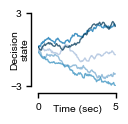

In [15]:
# plot the traces
import matplotlib as mpl
import matplotlib.pyplot as plt

with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1, 0.95))
    for i in range(num_traces):
        ax.plot(t_steps[:100], traces[i][:100], color=colors["x_shades"][i], alpha=0.75)
    ax.set_xlim(0, 1)

    # remove top and right spines
    ax.spines["left"].set_position(("outward", 5))
    ax.spines["bottom"].set_position(("outward", 5))
    # remove ticks and tick labels
#     ax.tick_params(axis="both", which="both", length=0)
#     ax.set_xticklabels([])
#     ax.set_yticklabels([])

    ax.set_xlabel("Time (sec)", labelpad=-5)
    ax.set_ylabel("Decision\nstate", labelpad=-14)
    ax.set_xticks([0, 1])
    ax.set_xticklabels([0, 5])
    max_val = np.max(np.abs([traces[i][:100] for i in range(num_traces)]))
    max_val = 3
    ax.set_ylim([-max_val, max_val])
    ax.set_yticks([-max_val, max_val])

    # save as svg
    plt.savefig("svg/panel_a1.svg", bbox_inches="tight", transparent=True)
    plt.show()

In [16]:
import IPython.display as IPd
from svgutils.compose import SVG, Figure, Panel, Text


def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img)))

svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

kwargs_text = {'size': '10pt', 'font': 'Arial', 'weight': '800'}
kwargs_text_normal = {'size': '7pt', 'font': 'Arial'}

f = Figure(
    "11.0cm",
    "3.2cm",
    Panel(
        SVG("svg/panel_a1.svg").scale(svg_scale).move(-5, 5),
        Text("a", 0, 0, **kwargs_text),
        Text("Drift-diffusion model", 20, 0, **kwargs_text_normal),
    ).move(0, 12),
    
    Panel(
        Text("Train NLE on single trials...", 10, 0.0, **kwargs_text_normal),
        Text("b", -5, 0, **kwargs_text),
        SVG("svg/panel_a2.svg").scale(5.0).move(0, 20),
    ).move(140, 12),
    
    Panel(
        Text("...and infer posterior", -10, 0.0, **kwargs_text_normal),
        Text("given many trials.", -2, 10.0, **kwargs_text_normal),
        SVG("svg/panel_a3.svg").scale(5.0).move(0, 33),
    ).move(300, 12),
)

!mkdir -p fig
f.save("svg/panel_a.svg")
svg("svg/panel_a.svg")